In [1]:
!mkdir -p ~/.kaggle
!cp /kaggle/input/kaggle-json/kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d marquis03/vehicle-classification

Dataset URL: https://www.kaggle.com/datasets/marquis03/vehicle-classification
License(s): Apache 2.0
100%|████████████████████████████████████████▉| 911M/914M [00:03<00:00, 267MB/s]
100%|█████████████████████████████████████████| 914M/914M [00:03<00:00, 258MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/kaggle/working/vehicle-classification.zip', 'r')
zip_ref.extractall('/kaggle/working/vehicle-classification_N')
zip_ref.close()

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,Adam,RMSprop
from keras.utils import to_categorical
import matplotlib.pyplot as plt


In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/working/vehicle-classification_N/train',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(100, 100)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/working/vehicle-classification_N/val',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(100, 100)
)


Found 1400 files belonging to 10 classes.
Found 200 files belonging to 10 classes.


In [7]:
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)  # map function takes one image and label and converts it to range 0-1 for good results
Validation_ds = validation_ds.map(process)



In [17]:
model=Sequential()


In [9]:
model = Sequential()
model.add(Conv2D(64,(4,4),input_shape=(100,100,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(4,4),input_shape=(100,100,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(4,4),input_shape=(100,100,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(100,100,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(4,4),input_shape=(100,100,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(100,100,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 100, 100, 64)   │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 100, 100, 64)   │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 50, 50, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 50, 50, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 25, 25, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,711,754 (21.79 MB)

 Trainable params: 5,709,962 (21.78 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
history=model.fit(train_ds,epochs=20,validation_data=Validation_ds)

Epoch 1/20
 1/44 ━━━━━━━━━━━━━━━━━━━━ 21:05 29s/step - accuracy: 0.0625 - loss: 3.7576

I0000 00:00:1716192202.392560     130 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716192202.417738     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.2862 - loss: 2.5696

W0000 00:00:1716192229.493890     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716192232.104792     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 752ms/step - accuracy: 0.2881 - loss: 2.5603 - val_accuracy: 0.1000 - val_loss: 5.4941
Epoch 2/20


W0000 00:00:1716192234.860811     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step - accuracy: 0.5234 - loss: 1.5429 - val_accuracy: 0.1000 - val_loss: 6.0741
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - accuracy: 0.6075 - loss: 1.2703 - val_accuracy: 0.0950 - val_loss: 4.3062
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step - accuracy: 0.6783 - loss: 0.9364 - val_accuracy: 0.1000 - val_loss: 4.5980
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 272ms/step - accuracy: 0.7673 - loss: 0.6975 - val_accuracy: 0.1000 - val_loss: 5.3608
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 266ms/step - accuracy: 0.7748 - loss: 0.6673 - val_accuracy: 0.1000 - val_loss: 5.9280
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - accuracy: 0.8502 - loss: 0.4595 - val_accuracy: 0.0900 - val_loss: 6.0422
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - accuracy: 0.8945 - loss: 0.3338 - val_accuracy: 0.1000 - val_loss: 6.2396
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - accuracy: 0.9280 - loss: 0.2535 - val_accuracy: 0.160

In [14]:
from tensorflow.keras.models import load_model
model.save('/kaggle/working/Trained_model_New.h5')


In [15]:
from IPython.display import FileLink

# Generate a link to download the model file
FileLink(r'Trained_model_New.h5')


/kaggle/working/Trained_model_New_n.h5

In [16]:
import cv2

In [24]:
test_img=cv2.imread('/kaggle/input/vehicle-classification/train/taxi/0ee0d23b1f7c67acef23ed9965e828c7.jpg')

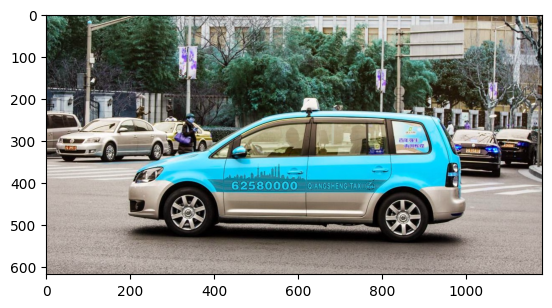

In [25]:
plt.imshow(test_img)

In [26]:
test_img=cv2.resize(test_img,(100,100))

In [27]:
test_input=test_img.reshape((1,100,100,3))

In [28]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)